<a id=0></a>
# 5.Distribution & Relational Plot

---
### [1.SearbornのデータセットからDataFrameを作成 ](#1)
### [2.Distribution Plot ](#2)
### [3.Relational Plot](#3)
### [4. Pandas Supplement : DatetimeIndex & map](#4)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id=1></a>
[Topへ](#0)

---
## 1. SearbornのデータセットからDataFrameを作成

* データセット(penguins)を読み込む
* データセットの整理
---

データセット('penguins')を読み込む

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('penguins')
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0  Adelie  Torgersen            39.1           18.7              181.0  \
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

データセットの整理

<p>
    <a href="https://www.kaggle.com/datasets/larsen0966/penguins?sort=votes" target="_blank" rel="noreferrer noopener">
        Kaggle Dataset Penguins のページへ
    </a>
</p>

    bill        : くちばし  
    flipper     : 翼
    body_mass_g : 体重    

In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# nullを持つレコードを全て削除
df.dropna(axis=0, inplace=True)

In [7]:
df.shape

(333, 7)

In [8]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

---
<a id=2></a>
[Topへ](#0)

---
## 2. Distribution Plot

* Seabornテーマの設定
* ヒストプロット : 度数分布を表す。横軸に階級、縦軸に度数
    * **sns.histplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.histplot のページへ
        </a>
    </p>


* KDEプロット : カーネル密度推定による分布を表す。横軸に階級
    * KDE(カーネル密度推定) : 有限のサンプルから全体の分布を推定
    * **sns.kdeplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.kdeplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.kdeplot のページへ
        </a>
    </p>
---

Seabornテーマの設定

In [12]:
sns.set_theme(context='talk', style='darkgrid', font='HackGen')

ヒストプロット

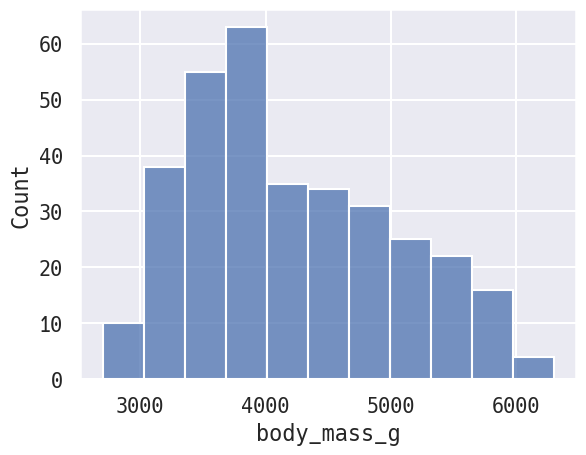

In [13]:
sns.histplot(data=df, x='body_mass_g')
plt.show()

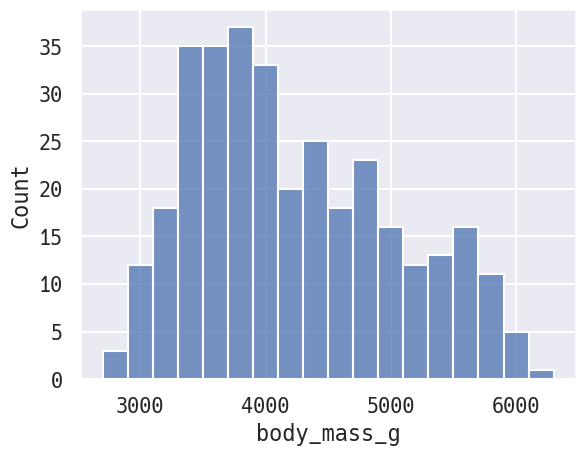

In [14]:
# binsの変更
sns.histplot(data=df, x='body_mass_g', bins=18)
plt.show()

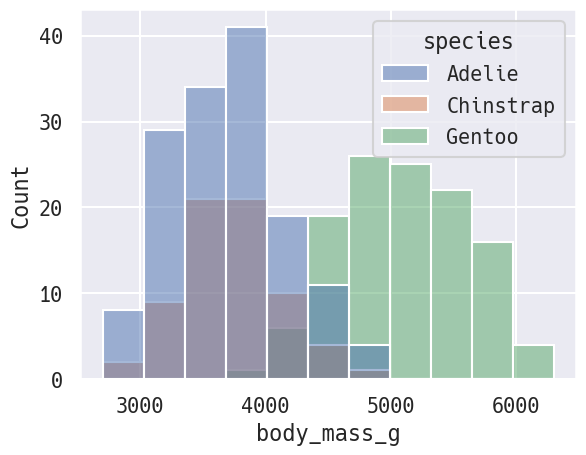

In [15]:
# hueの使用
sns.histplot(data=df, x='body_mass_g', hue='species')
plt.show()

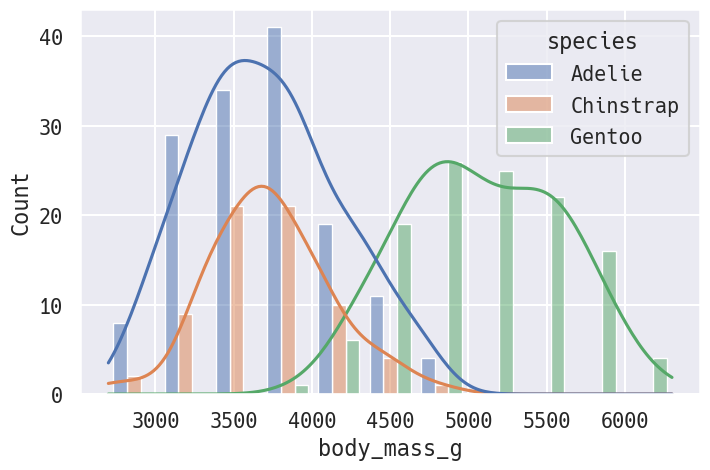

In [16]:
# multiple='dodge', shrink=0.8, kde=True
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge', shrink=0.8, kde=True)
plt.show()

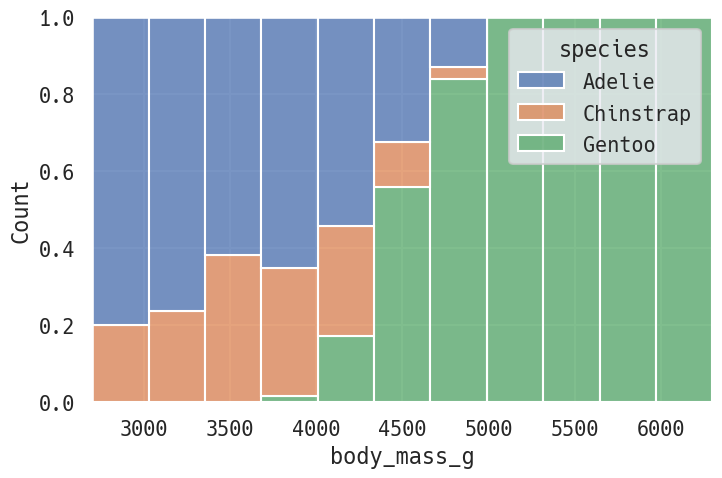

In [20]:
# 'layer', 'dodge, 'stack', 'fill'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='fill')
plt.show()

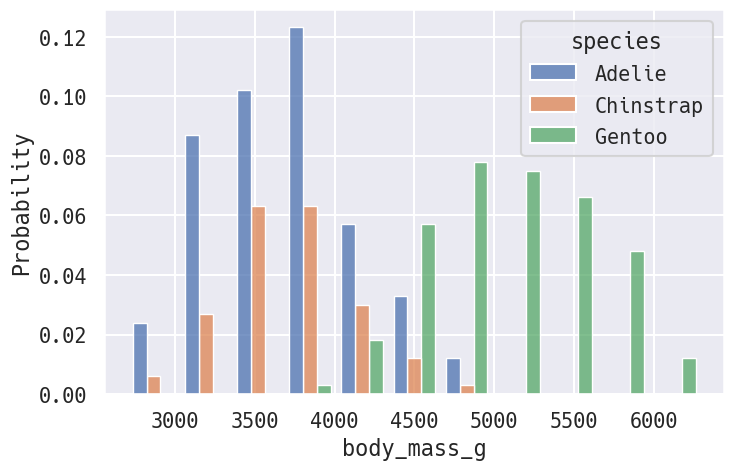

In [24]:
# count, density, probability
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge', shrink=0.8, stat='probability')
plt.show()

KDEプロット

/var/folders/f5/_tj1zvq95fx0wllynn0tpq800000gn/T/ipykernel_21267/3271808184.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='body_mass_g', hue='species', shade=True, palette='viridis', multiple='fill')


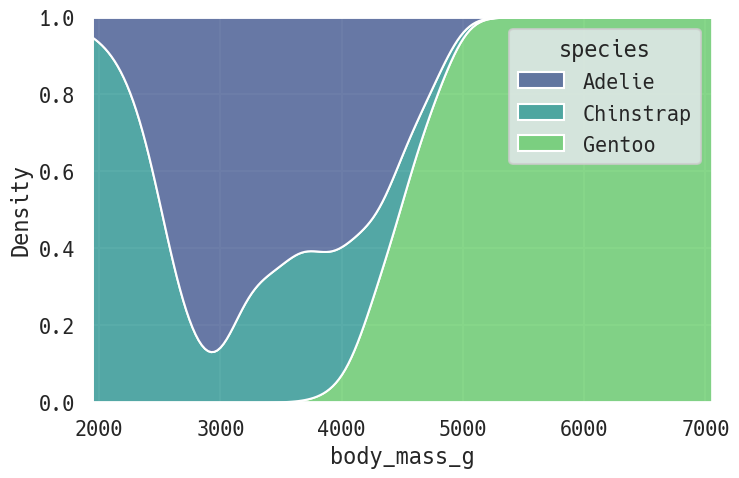

In [27]:
# sns.histplot(data=df, x='body_mass_g', hue='species', multiple='fill')のなだらかな表現
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='body_mass_g', hue='species', shade=True, palette='viridis', multiple='fill')
plt.show()

---
<a id=3></a>
[Topへ](#0)

---
## 3. Relational Plot

* ジョイントプロット : 2変数の関係をスキャッタープロットとKEDプロットで表示（デフォルト設定）
    * **sns.jointplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.jointplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.jointplot のページへ
        </a>
    </p>
    

* スキャッタープロット : 散布図。2変数の関係を点の分布により表す
    * **sns.scatterplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.scatterplot のページへ
        </a>
    </p>


* RELプロット : スキャッタープロットをさらにクラス分けして行・列で表す
    * **sns.relplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.relplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.relplot のページへ
        </a>
    </p>


* REGプロット : スキャッタープロットと線形回帰直線を表す
    * **sns.regplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.regplot のページへ
        </a>
    </p>


* LMプロット : REGプロットをさらにクラス分けして行・列で表す
    * **sns.lmplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.lmplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.lmplot のページへ
        </a>
    </p>


* ペアプロット : すべての数値データの組み合わせを行い、グリッドで2変数の関係を表す
    * **sns.pairplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.pairplot のページへ
        </a>
    </p>
    
    
* ラインプロット : 折れ線グラフ。点をつなぎ、主に連続的変化の推移を表す
    * **sns.lineplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.lineplot のページへ
        </a>
    </p>
    
   

---

ジョイントプロット

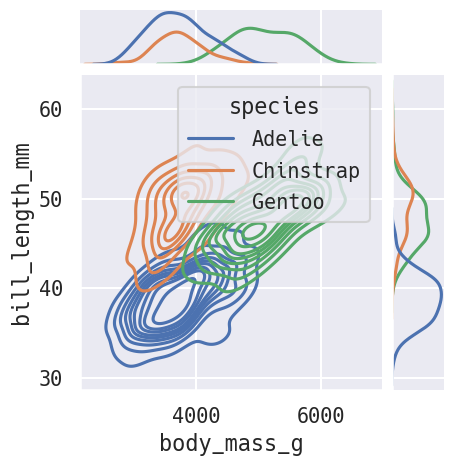

In [28]:
# 二種類のプロットで表現
# kindを使うこの種のプロットは表示設定に融通が利かないことがあり、シンプルにscatterplotを使うことをお勧めします
sns.jointplot(data=df, x='body_mass_g', y ='bill_length_mm', hue='species', height=5, kind='kde')
plt.show()
# kind : ked, hist, scatter(default)

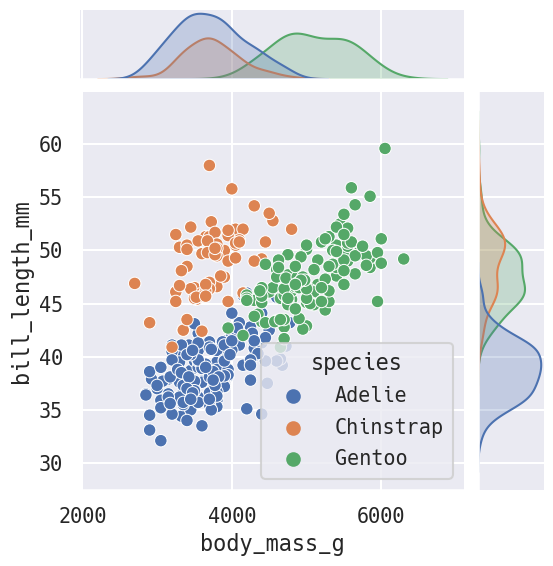

In [29]:
sns.jointplot(data=df, x='body_mass_g', y ='bill_length_mm', hue='species', height=6, kind='scatter')
plt.show()
# kind : ked, hist, scatter(default)

スキャッタープロット

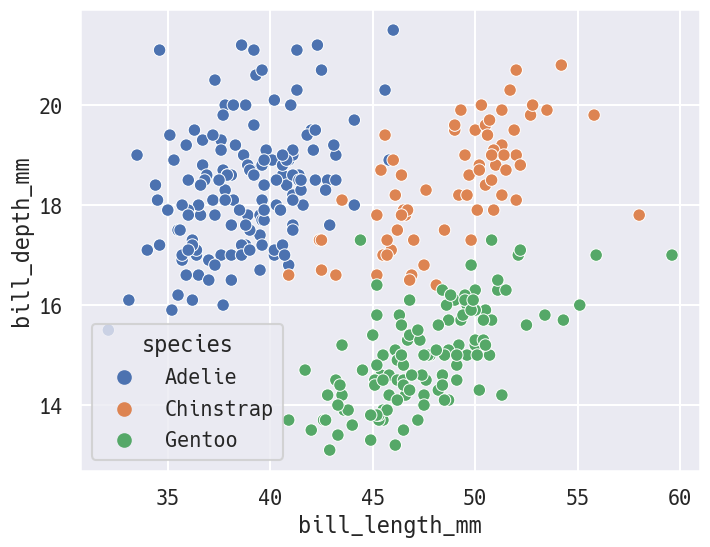

In [30]:
# リレーショナルプロットと言えばスキャッタープロット
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

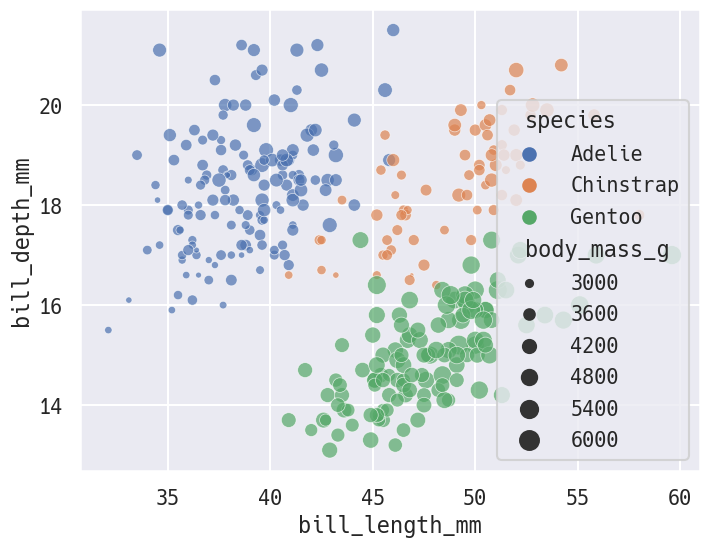

In [31]:
# alpha, size, sizes(min, max)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', alpha=0.7, size='body_mass_g', sizes=(10, 200))
plt.show()

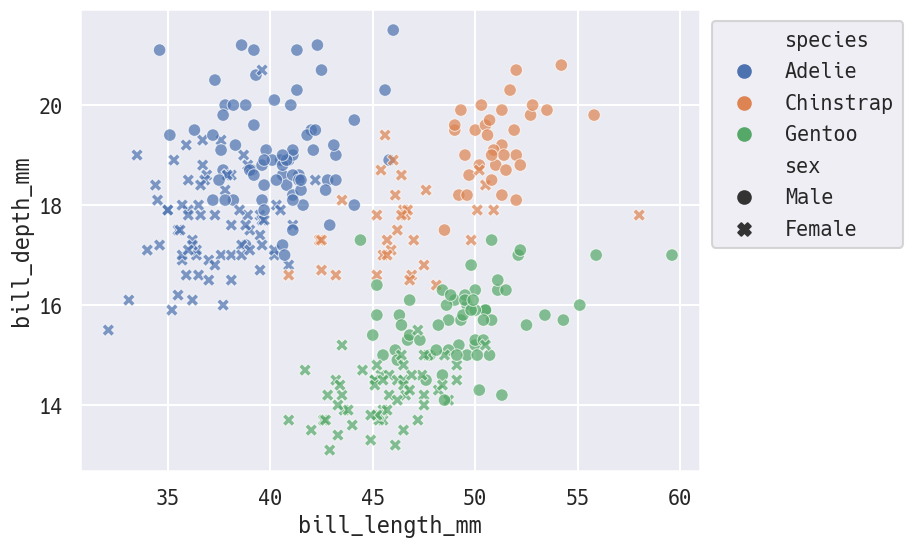

In [34]:
# legendを図（axes）の外に出すには
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', markers=['o', 'X'], alpha=0.7)
plt.legend(bbox_to_anchor=(1, 1))
# 数値と実際の配置の関係が曖昧だが、微調整して使う
plt.show()

RELプロット

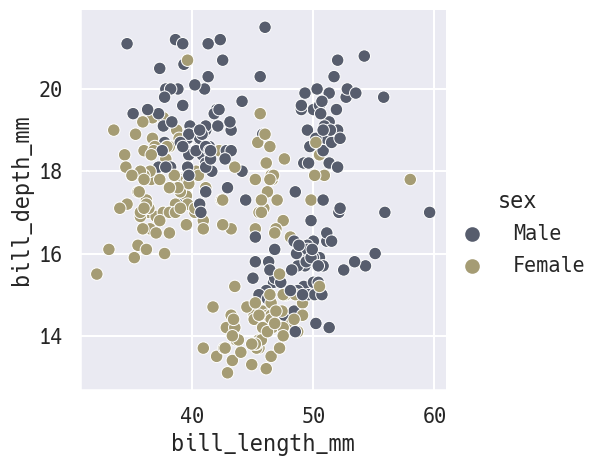

In [37]:
# scatterplotと同じ
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', palette='cividis')
plt.show()

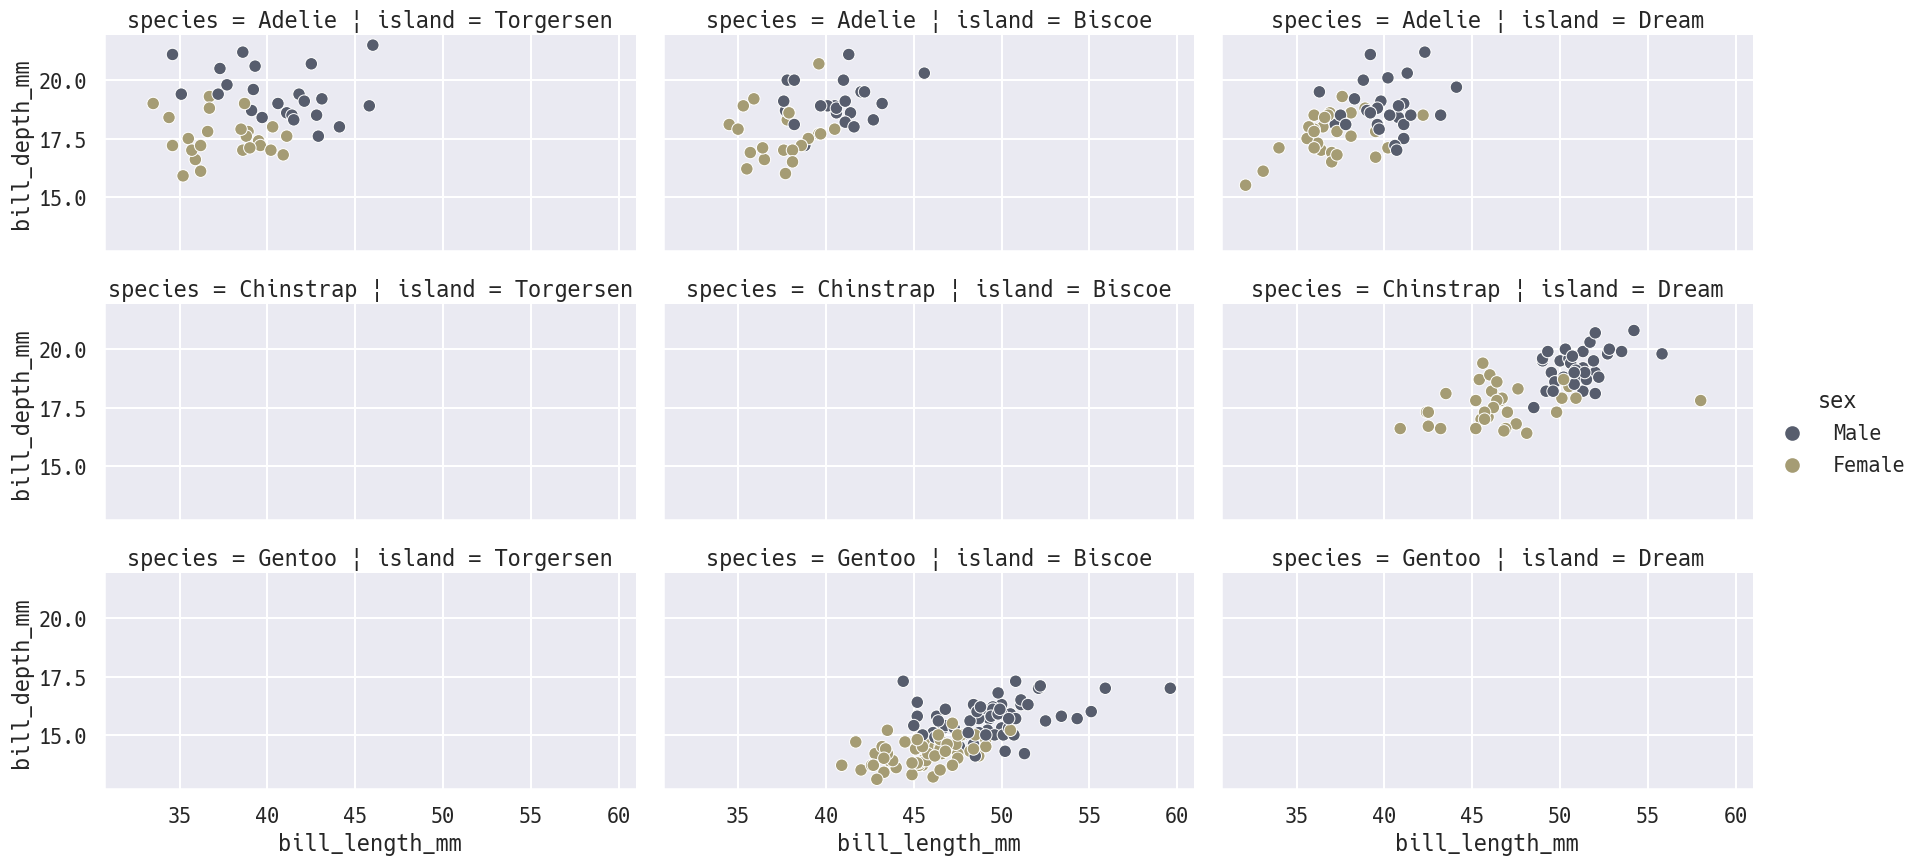

In [38]:
# col, rowを追加
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', palette='cividis', col='island', row='species', height=3, aspect=2)
plt.show()

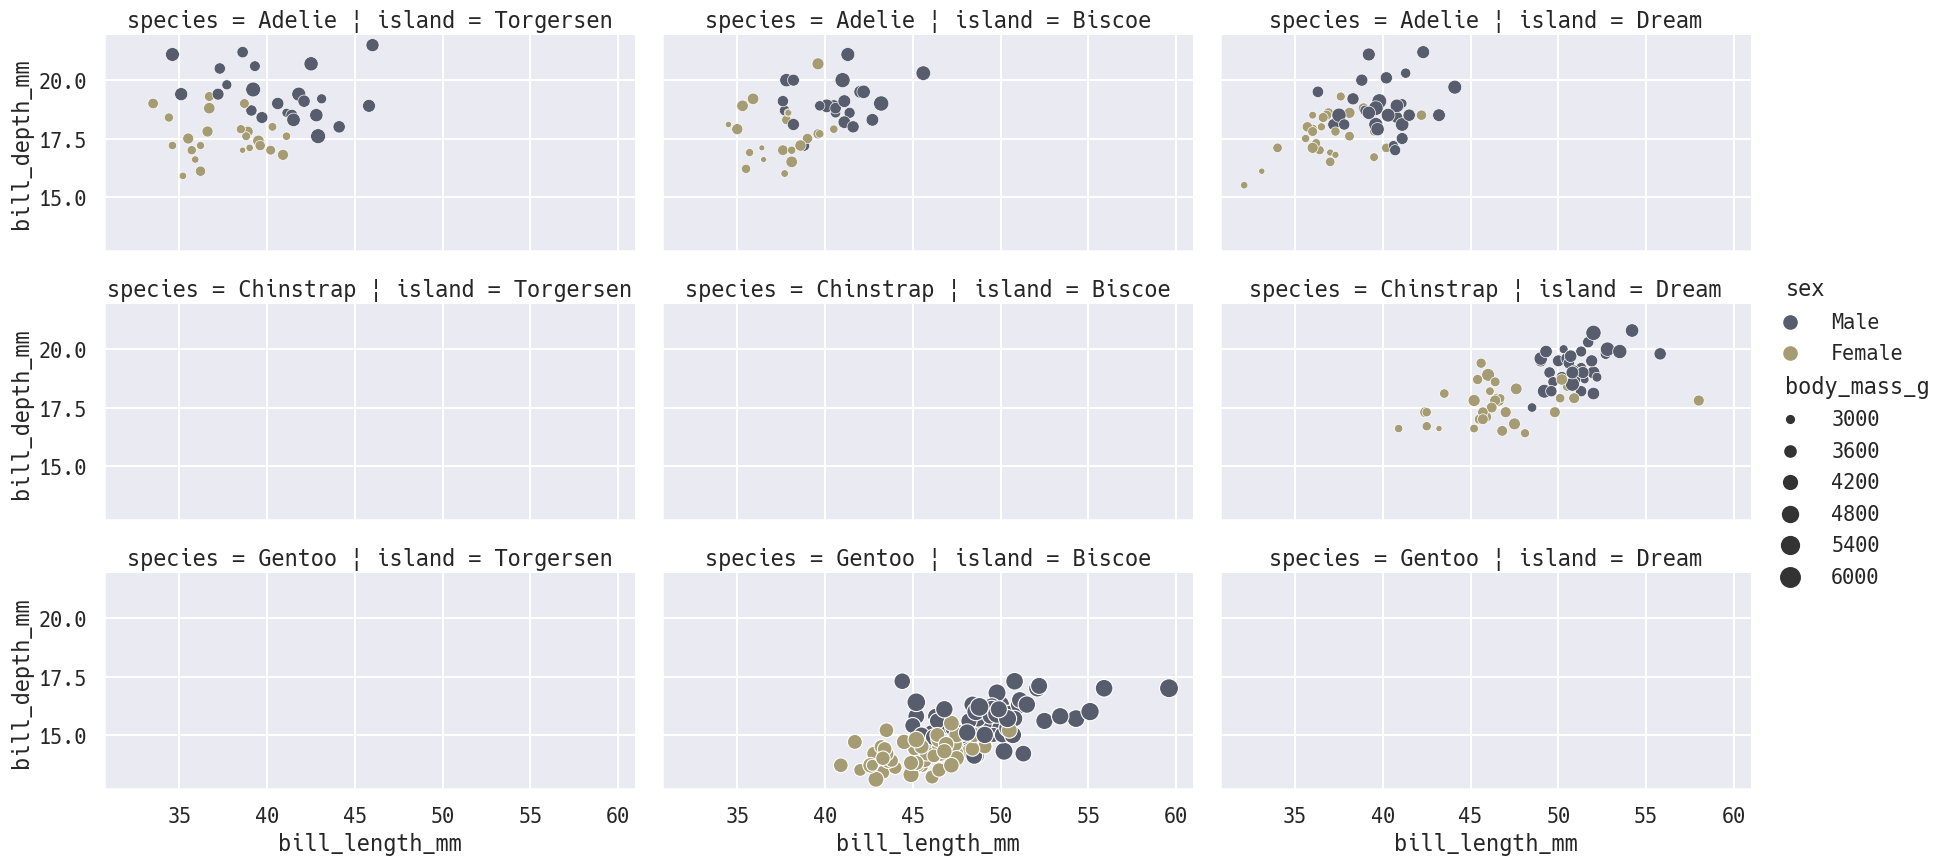

In [39]:
# size
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', palette='cividis', col='island', row='species', size='body_mass_g', sizes=(10, 200), height=3, aspect=2)
plt.show()
# 文字が重なる場合はheight, aspectで調整する

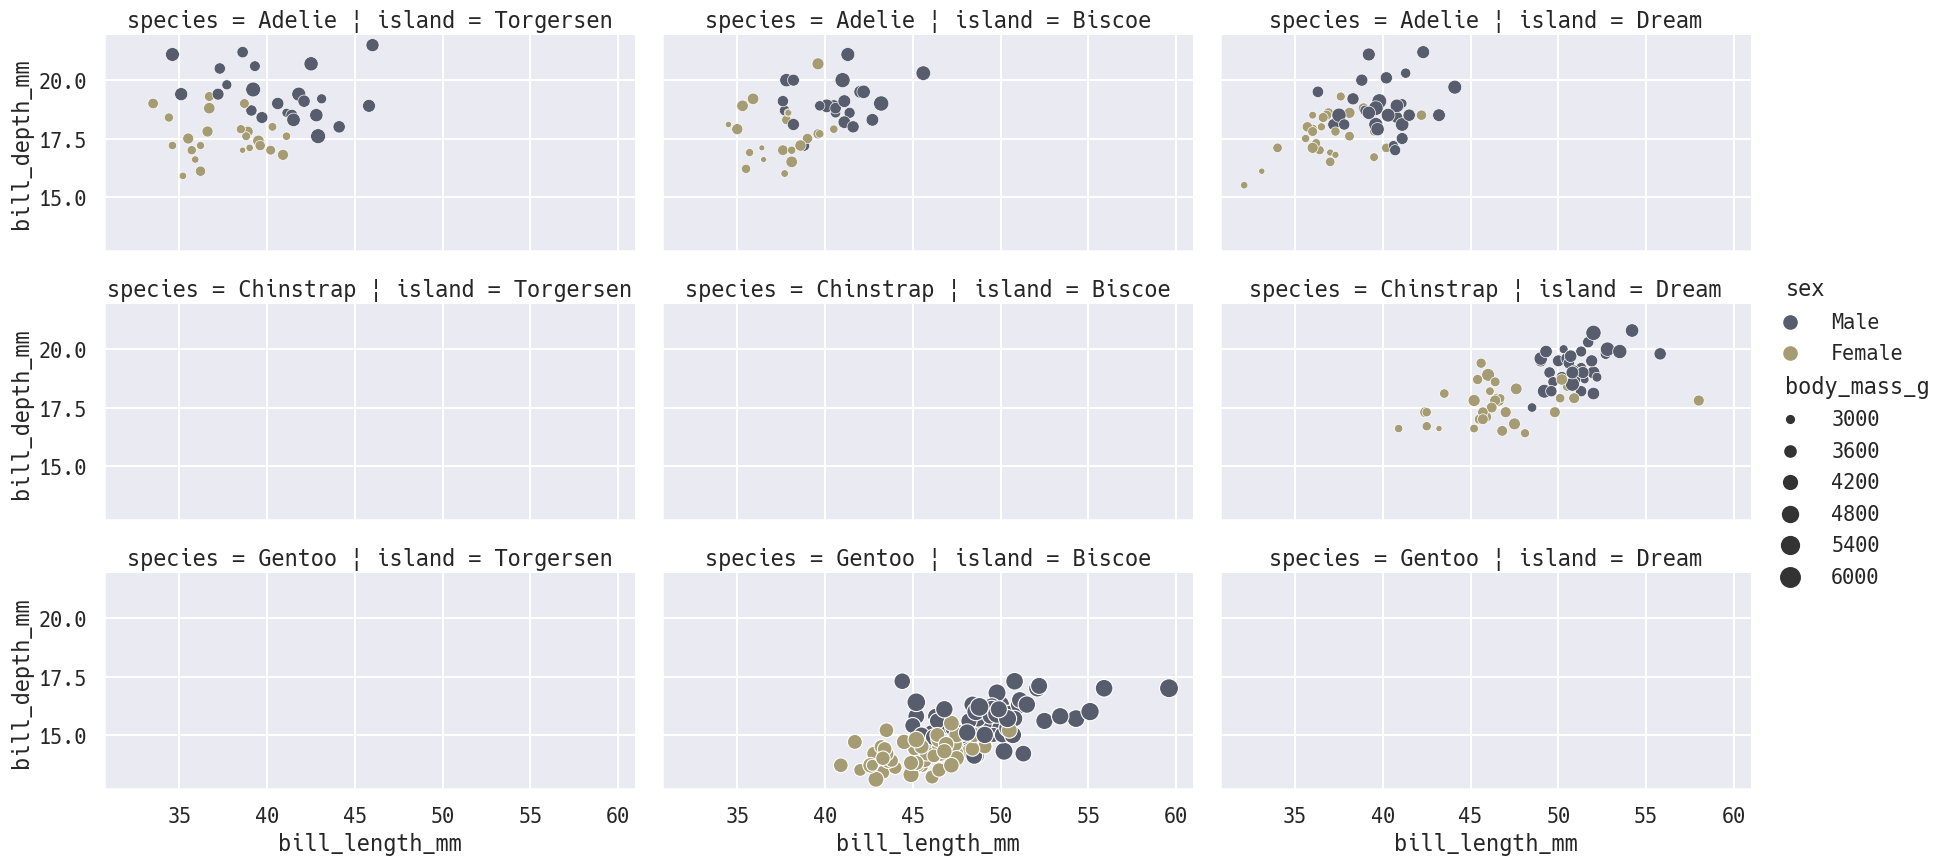

In [40]:
# g = sns.relplot(***)としてメソッドなどを使う場合もあるが、複雑にせずSeabornの設定で十分
g = sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', palette='cividis', col='island', row='species', size='body_mass_g', sizes=(10, 200), height=3, aspect=2)

plt.show()

REGプロット

In [47]:
adelie = df.groupby('species').get_group('Adelie')
chinstrap = df.groupby('species').get_group('Chinstrap')
gentoo = df.groupby('species').get_group('Gentoo')
# adelie = df[df['species'] == 'Adelie']と同じこと。←こちらの方がよい選択

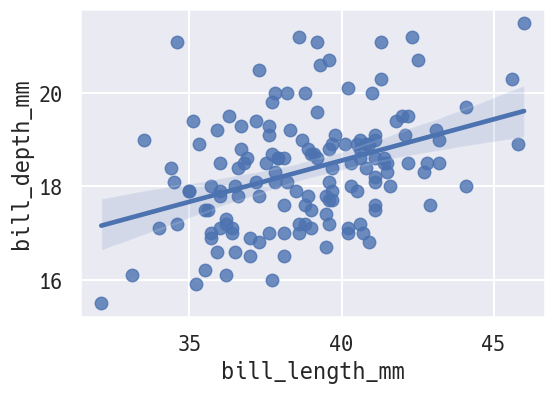

In [48]:
# 回帰直線を付加したスキャッタープロット
plt.figure(figsize=(6, 4))
sns.regplot(data=adelie, x='bill_length_mm', y='bill_depth_mm')
plt.show()

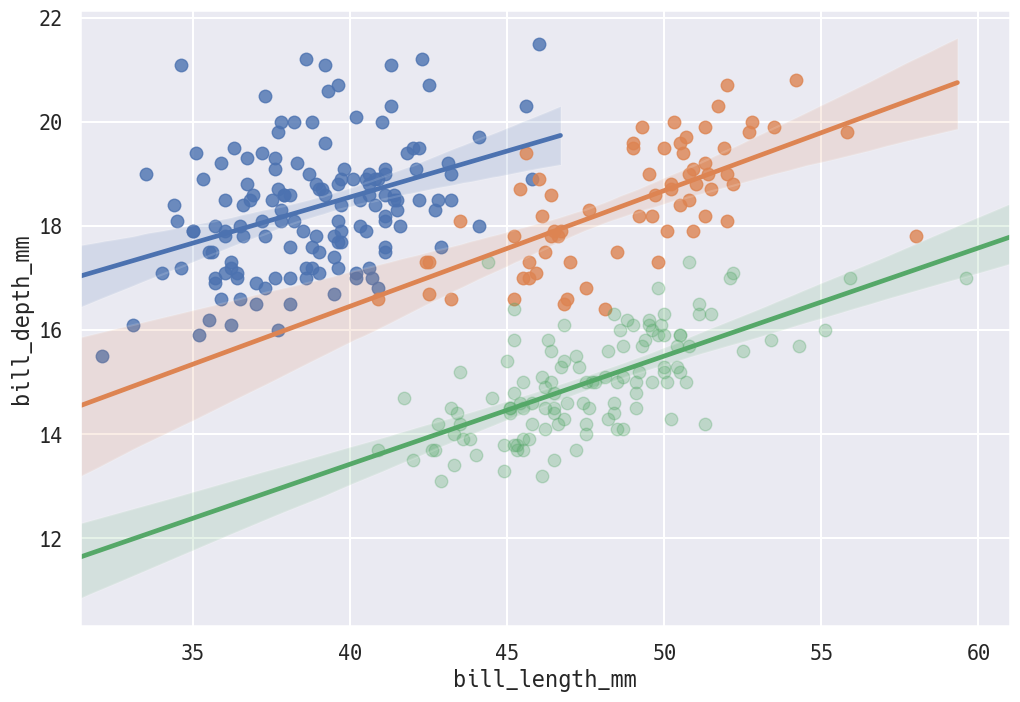

In [55]:
# scatter=False, truncate=False, scatter_kws
# あまり複雑にして深みにはまらないように
plt.figure(figsize=(12, 8))
sns.regplot(data=adelie, x='bill_length_mm', y='bill_depth_mm', truncate=False)
sns.regplot(data=chinstrap, x='bill_length_mm', y='bill_depth_mm', truncate=False)
sns.regplot(data=gentoo, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'alpha':0.3}, truncate=False)
plt.show()

LMプロット

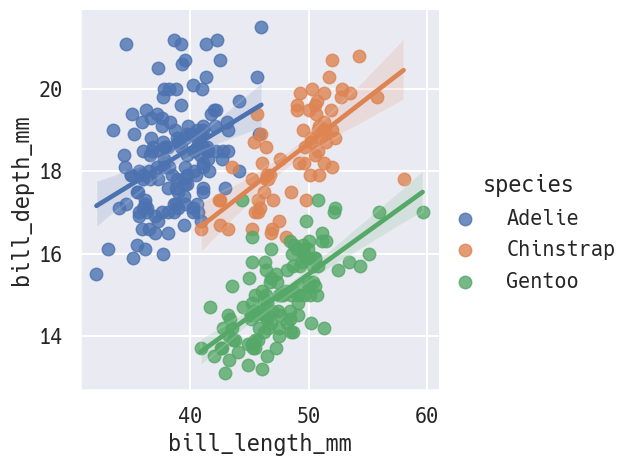

In [56]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

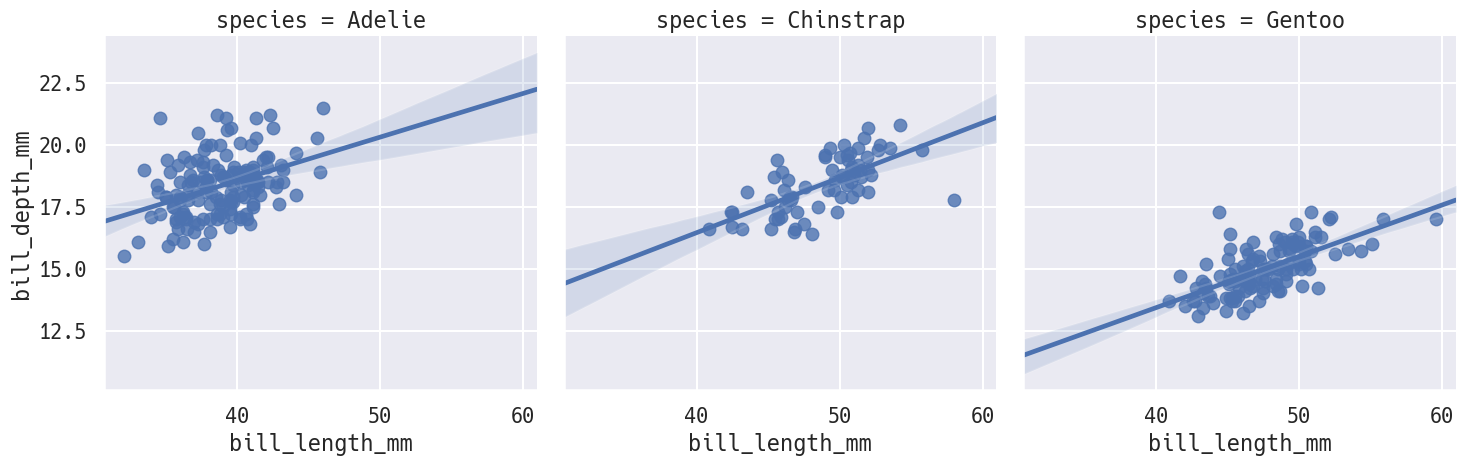

In [57]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', col='species', truncate=False)
plt.show()

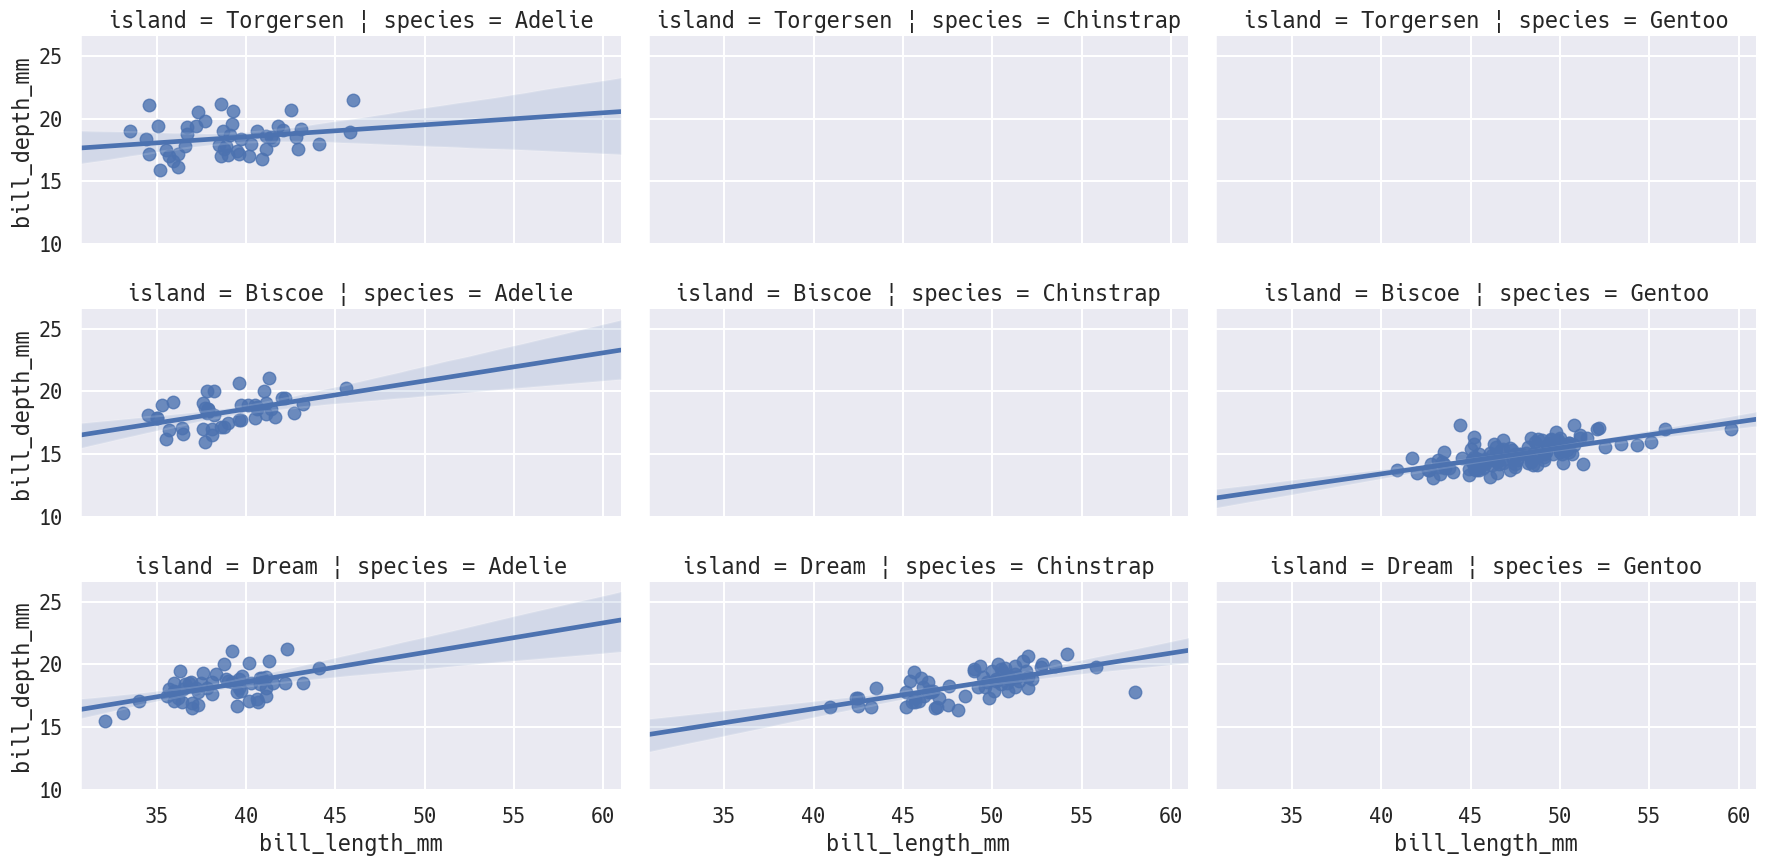

In [58]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', col='species',row='island', truncate=False, height=3, aspect=2)
plt.show()

ペアプロット

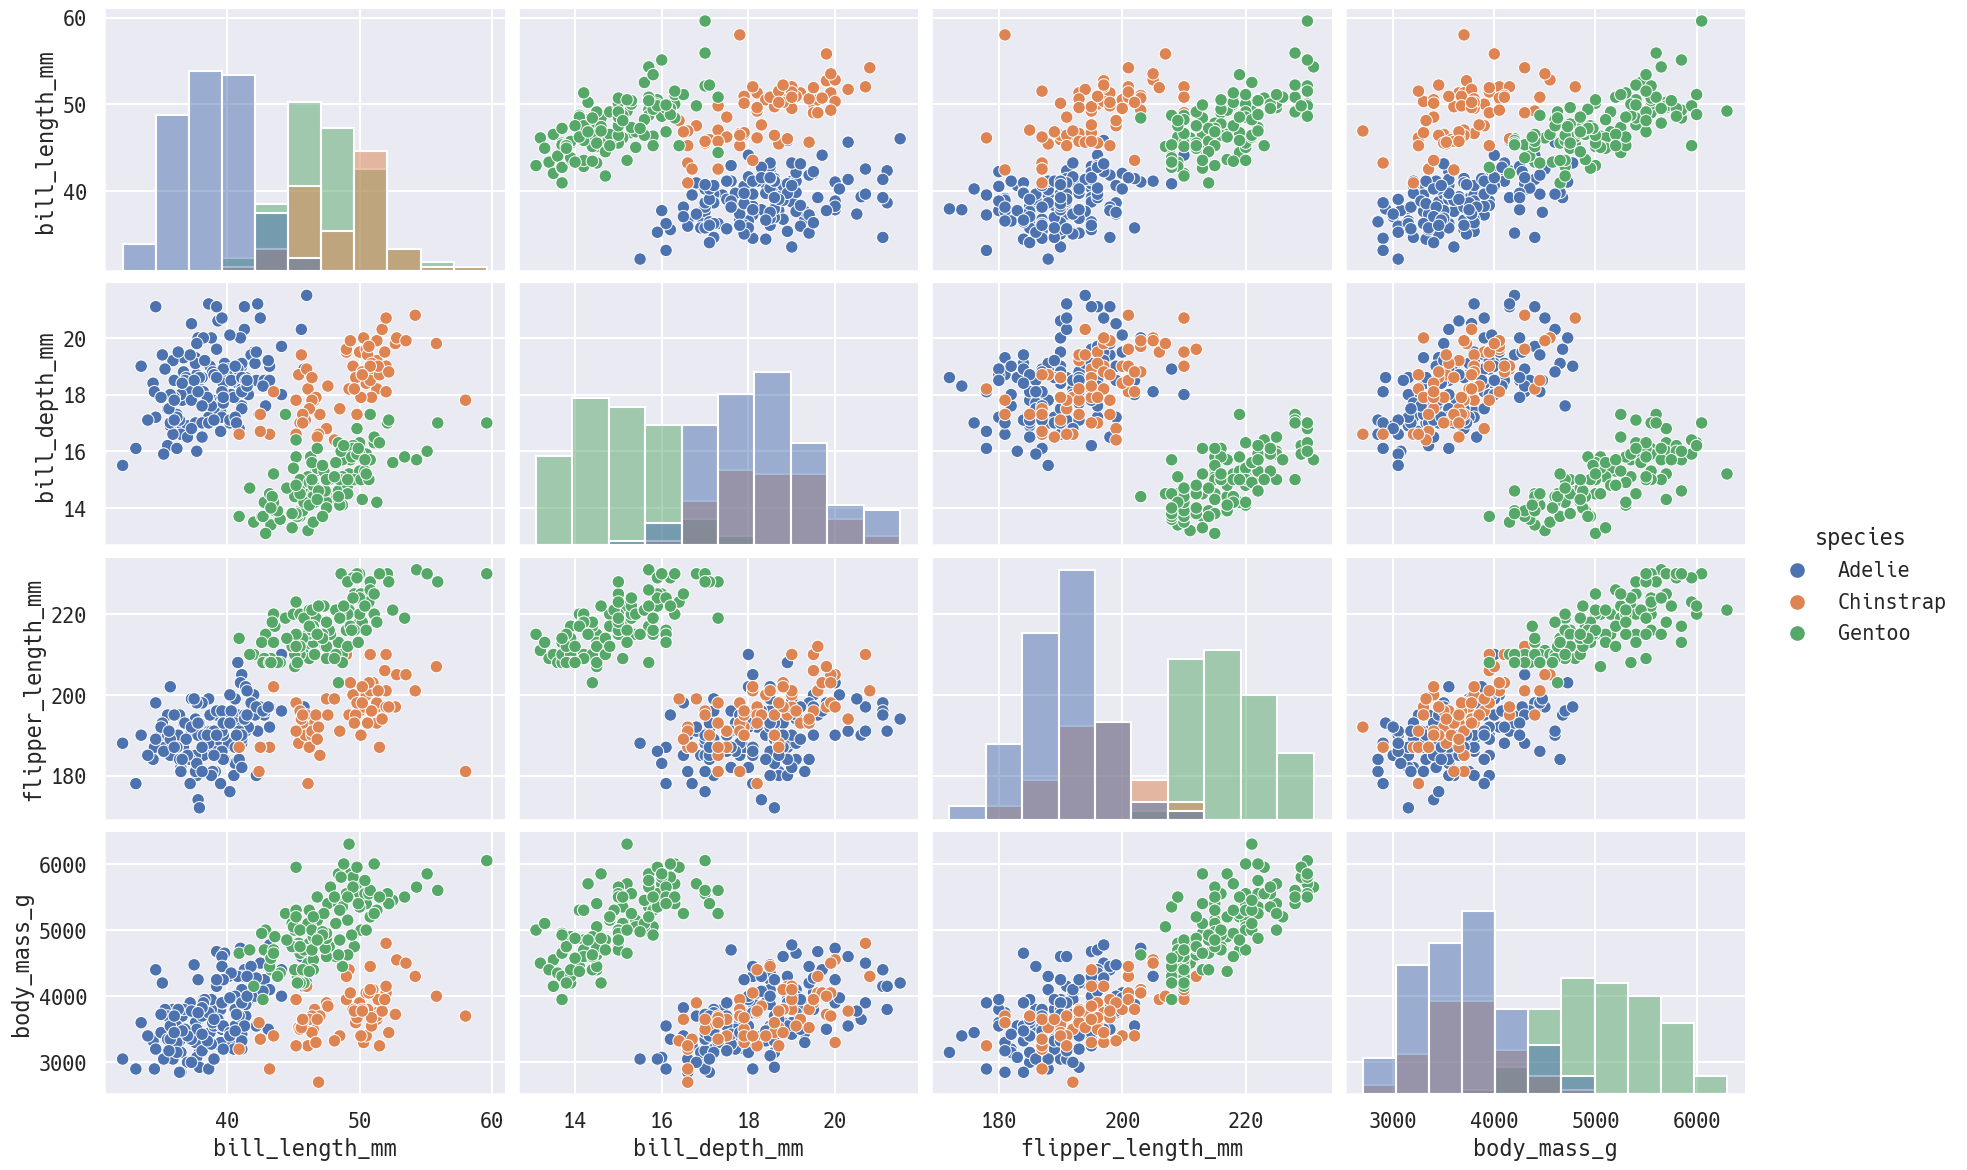

In [45]:
# すべての数値データをペアにする
sns.pairplot(data=df, height=3, aspect=1.5, hue="species", diag_kind="hist")
plt.show()

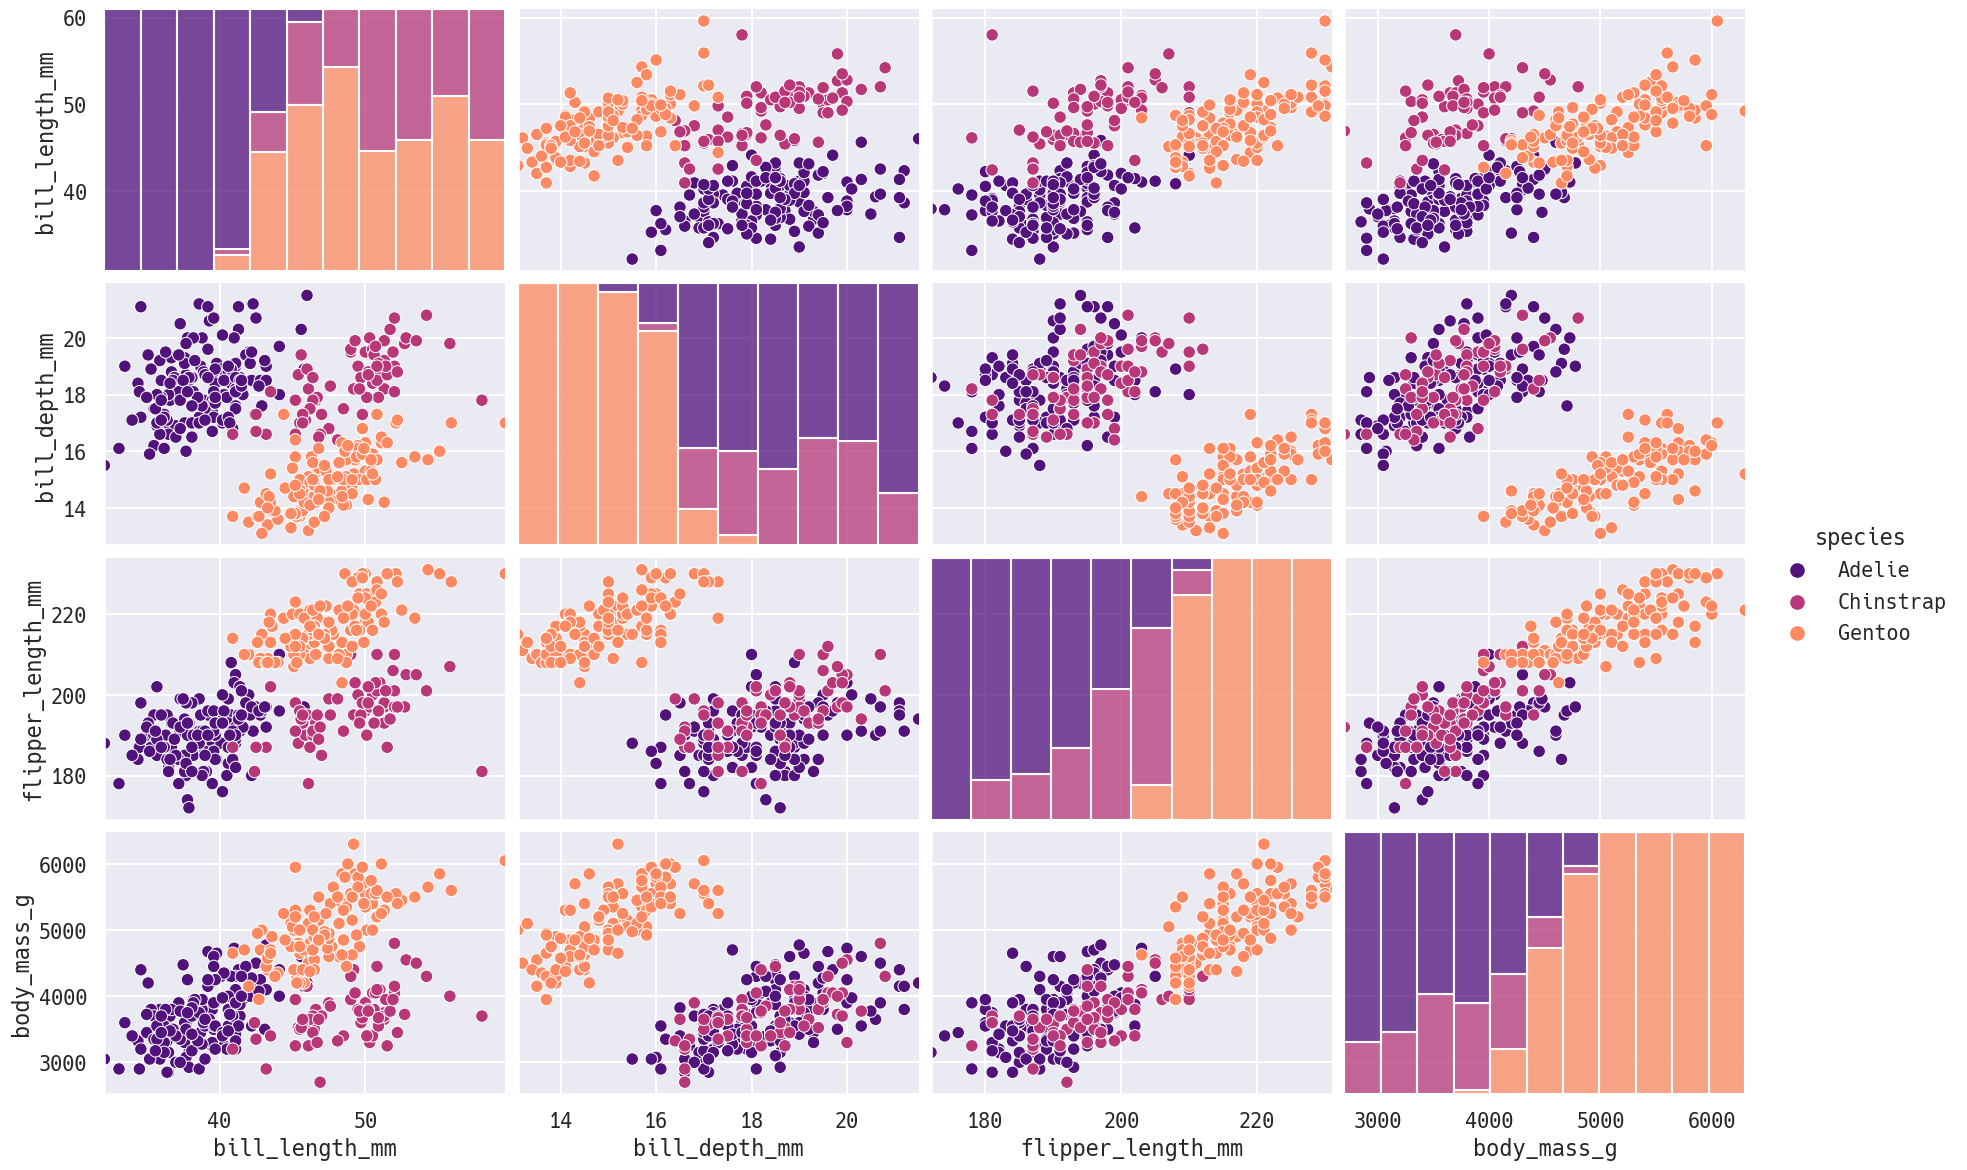

In [42]:
# 対角線上のプロットを指定する
sns.pairplot(data=df, hue='species', palette='magma', diag_kind='hist', height=3, aspect=1.5, diag_kws={'multiple':'fill'})
plt.show()
# diag_kind : auto, hist, kde, None

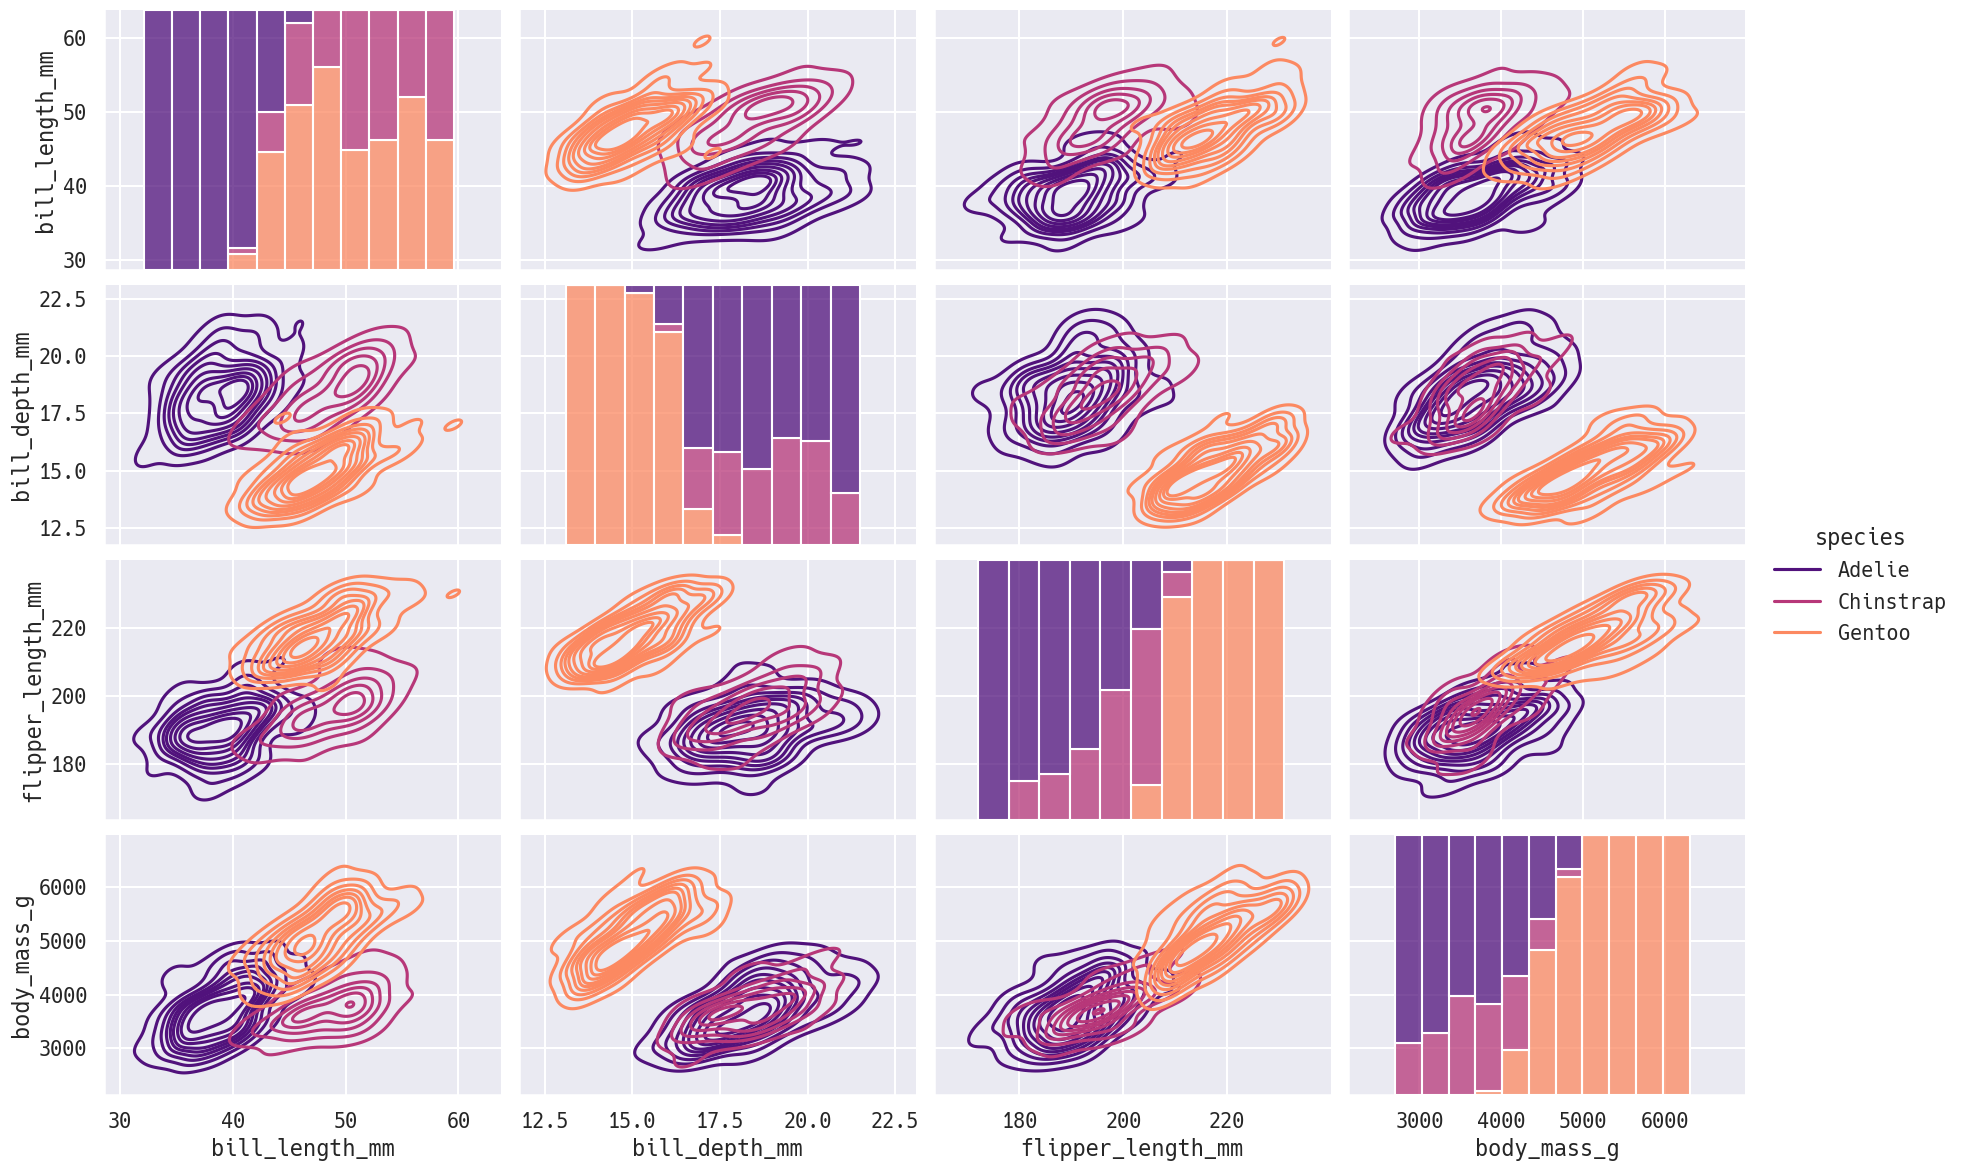

In [46]:
# kindを指定する
sns.pairplot(data=df, hue='species', palette='magma', kind='kde', diag_kind='hist', height=3, aspect=1.5, diag_kws={'multiple':'fill'})
plt.show()
# kind : scatter, kde, hist, reg

ラインプロット

In [59]:
flights = sns.load_dataset('flights')
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [60]:
flights.shape

(144, 3)

In [61]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


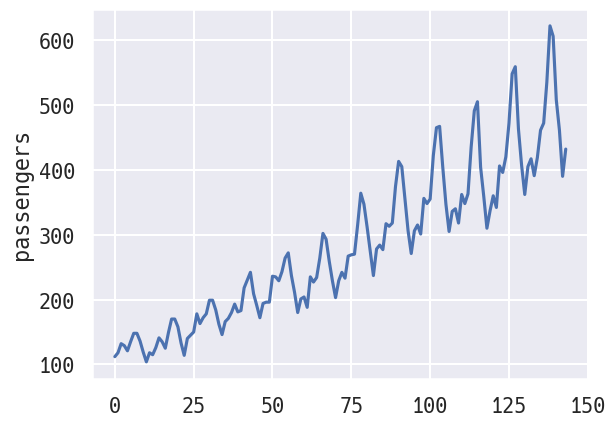

In [62]:
sns.lineplot(data=flights, x=flights.index, y='passengers')
plt.show()

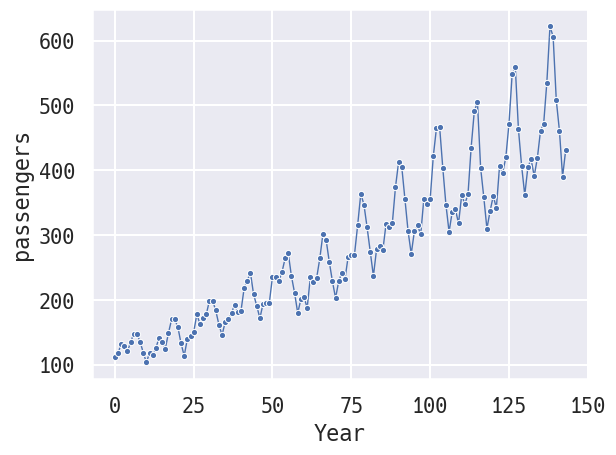

In [63]:
# x label
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='.', linewidth=1)
plt.xlabel('Year')
plt.show()

In [64]:
# 0 = 1949, 12=1950, 24=1951, つまり1が1ヶ月ということ
idx = np.arange(0, 144, 12)
years = np.arange(1949, 1961)

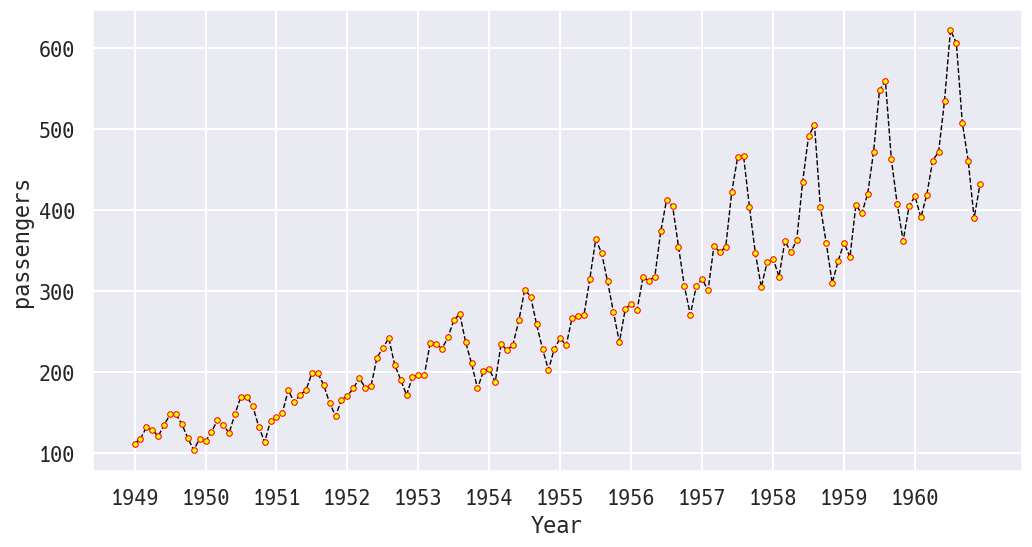

In [65]:
# xticks label
# 詳細な表示設定
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='.', markersize=8, linewidth=1, markerfacecolor='yellow', markeredgecolor='red', color='black', linestyle='--')
# '-', '--', ':'
plt.xlabel('Year')
plt.xticks(idx, years)
plt.show()

オブジェクト指向型のプロット作成

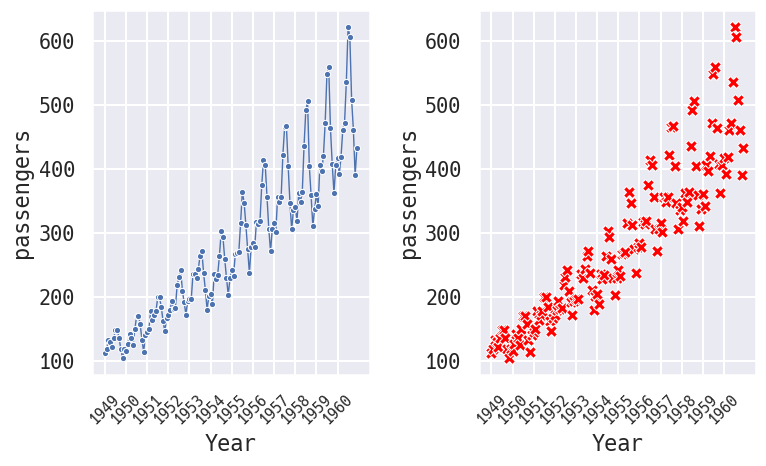

In [66]:
# plt.subplots(2,2)だけで確認すると構造が分かる
# tight_layout=Trueはいつも設定するように
# figureは全体、axesはその中のラベルや軸を含んだプロットを行うステージ
fig, axes = plt.subplots(1, 2, figsize=(8, 5), tight_layout=True)
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='.', linewidth=1, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_xticks(idx)
axes[0].set_xticklabels(years, rotation=45, fontsize=12)

sns.lineplot(data=flights, x=flights.index, y='passengers', marker='X', markerfacecolor='red', linewidth=0, ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_xticks(idx)
axes[1].set_xticklabels(years, rotation=45, fontsize=12)   # size=12でもOK
plt.show()

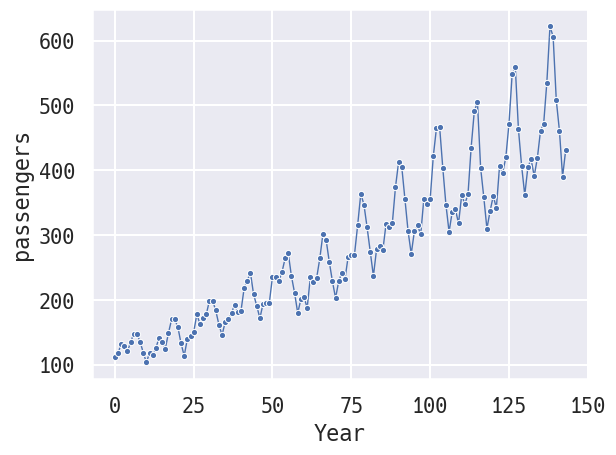

In [67]:
# ひとつの場合
fig, axes = plt.subplots()
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='.', linewidth=1, ax=axes)
plt.xlabel('Year')
plt.show()

Categoty型とは

In [68]:
flights_jj = flights[flights['month'].isin(['Jan', 'Jul'])].reset_index()
flights_jj.head()

index  year month  passengers
0      0  1949   Jan         112
1      6  1949   Jul         148
2     12  1950   Jan         115
3     18  1950   Jul         170
4     24  1951   Jan         145

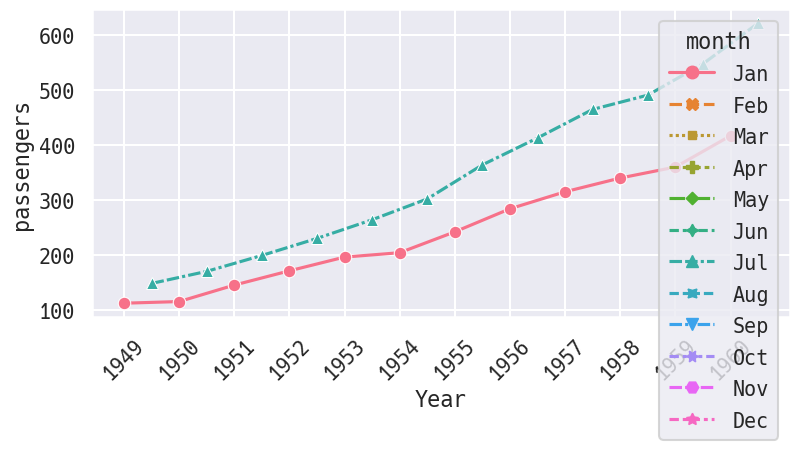

In [69]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=flights_jj, x=flights_jj.index, y='passengers', hue='month', style='month', markers=True)
plt.xlabel('Year')
plt.xticks(np.arange(0, 24, 2), np.arange(1949, 1961), rotation=45)
plt.show()
# なぜJanuary, July以外があるのか？

In [73]:
flights_jj.info()
# category?
# メモリ消費が低く、処理速度が上がるようです
# 自分で大きなデータセットを作ることがなければ自ら設定する必要はなく、今回のような扱い方ができれば十分だと思います

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       24 non-null     int64   
 1   year        24 non-null     int64   
 2   month       24 non-null     category
 3   passengers  24 non-null     int64   
dtypes: category(1), int64(3)
memory usage: 1.1 KB


In [74]:
# object型に変更
flights_jj['month'] = flights_jj['month'].astype(object)

In [75]:
flights_jj.dtypes

index          int64
year           int64
month         object
passengers     int64
dtype: object

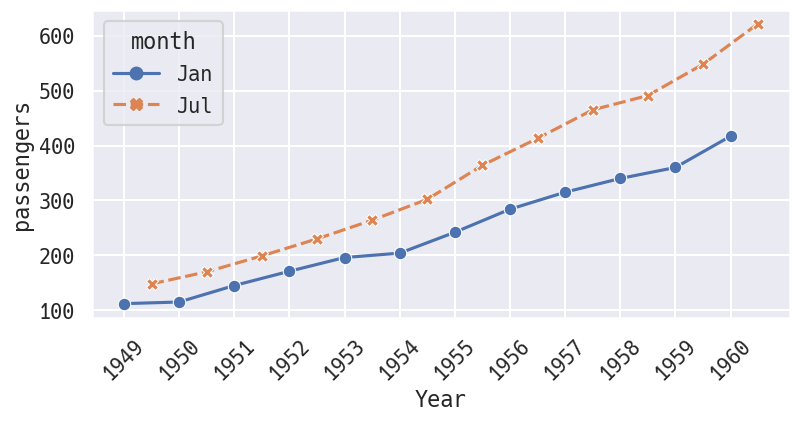

In [76]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=flights_jj, x=flights_jj.index, y='passengers', hue='month', style='month', markers=True)
plt.xlabel('Year')
plt.xticks(np.arange(0, 24, 2), np.arange(1949, 1961), rotation=45)
plt.show()

---
<a id=4></a>
[Topへ](#0)

---
## 4. Pandas Supplement : DatetimeIndex & map

* Series.map()を使いJanを1に、Febを2に
* 文字列を結合して新しいカラムを作る
* to_datetimeでDatetime型に変更
* Datetimeの機能で情報を取得する
* ある時点からの差を取得する
* DatetimeIndexにしてresamplingを行う
* shiftを使って変化量を算出
---

Series.map()を使いJanを1に、Febを2に  

※ Seriesの各要素にはmapもしくはapply、DataFrameの行列にはapply、DataFrameの各要素に対してはapplymap  
※ for文を使うよりはずっと早い  
※ loc, ilocでの書き換えで対応しづらいような場合、簡潔に記述したい場合に使用する  
    

In [77]:
flights.head(12)

year month  passengers
0   1949   Jan         112
1   1949   Feb         118
2   1949   Mar         132
3   1949   Apr         129
4   1949   May         121
5   1949   Jun         135
6   1949   Jul         148
7   1949   Aug         148
8   1949   Sep         136
9   1949   Oct         119
10  1949   Nov         104
11  1949   Dec         118

In [78]:
month_dict ={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [80]:
# series.map(dictionary)  値を置換する
flights['month'].map(month_dict)

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: month, Length: 144, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [81]:
s = flights['month'].map(month_dict).astype(int)[:12]
s

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int64

In [82]:
# lambda function
s.map(lambda x: x * 2)

0      2
1      4
2      6
3      8
4     10
5     12
6     14
7     16
8     18
9     20
10    22
11    24
Name: month, dtype: int64

In [83]:
flights['month_n'] = flights['month'].map(month_dict)
flights.head()

year month  passengers month_n
0  1949   Jan         112       1
1  1949   Feb         118       2
2  1949   Mar         132       3
3  1949   Apr         129       4
4  1949   May         121       5

文字列を結合して新しいカラムを作る

In [84]:
# string型にして結合
flights['year'].map(lambda x: str(x) + '/')

0      1949/
1      1949/
2      1949/
3      1949/
4      1949/
       ...  
139    1960/
140    1960/
141    1960/
142    1960/
143    1960/
Name: year, Length: 144, dtype: object

In [ ]:
# flights['year'].map(lambda x: str(x) + '/') + flights['month_n']
# TypeError: Object with dtype category cannot perform the numpy op add
# category型はaddできない

In [85]:
flights['month_n'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=False)

In [86]:
flights['year_n_month'] = flights['year'].map(lambda x: str(x) + '/') + flights['month_n'].astype(str)
# object型にすると、object型ではintも含んでしまうため、string+intができないというエラーが発生する。.astype(str)とする。
flights.head()

year month  passengers month_n year_n_month
0  1949   Jan         112       1       1949/1
1  1949   Feb         118       2       1949/2
2  1949   Mar         132       3       1949/3
3  1949   Apr         129       4       1949/4
4  1949   May         121       5       1949/5

to_datetimeでDatetime型に変更

In [96]:
flights['date'] = pd.to_datetime(flights['year_n_month'])
flights.head()

/var/folders/f5/_tj1zvq95fx0wllynn0tpq800000gn/T/ipykernel_21267/4056515637.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights['date'] = pd.to_datetime(flights['year_n_month'])


year month  passengers month_n year_n_month       date
date                                                              
1949-01-01  1949   Jan         112       1       1949/1 1949-01-01
1949-02-01  1949   Feb         118       2       1949/2 1949-02-01
1949-03-01  1949   Mar         132       3       1949/3 1949-03-01
1949-04-01  1949   Apr         129       4       1949/4 1949-04-01
1949-05-01  1949   May         121       5       1949/5 1949-05-01

Datetimeの機能で情報を取得する

In [97]:
flights['date'].dt.day_name()
# year / month / day / date / day_name() / weekday (0:Monday) / time / hour

date
1949-01-01    Saturday
1949-02-01     Tuesday
1949-03-01     Tuesday
1949-04-01      Friday
1949-05-01      Sunday
                ...   
1960-08-01      Monday
1960-09-01    Thursday
1960-10-01    Saturday
1960-11-01     Tuesday
1960-12-01    Thursday
Name: date, Length: 144, dtype: object

ある時点からの差を取得する

In [98]:
# datetime型のシンプルな形式。年月日時間のある変数を作成
one_day = pd.Timestamp('19940705')
one_day

Timestamp('1994-07-05 00:00:00')

In [100]:
# 差も求められる
# timedeltaというものも他にある
flights['days_left'] = flights['date'].map(lambda x:one_day - x)
flights.head()

year month  passengers month_n year_n_month       date  days_left
date                                                                         
1949-01-01  1949   Jan         112       1       1949/1 1949-01-01 16621 days
1949-02-01  1949   Feb         118       2       1949/2 1949-02-01 16590 days
1949-03-01  1949   Mar         132       3       1949/3 1949-03-01 16562 days
1949-04-01  1949   Apr         129       4       1949/4 1949-04-01 16531 days
1949-05-01  1949   May         121       5       1949/5 1949-05-01 16501 days

DatetimeIndexにしてresamplingを行う

In [101]:
# indexをDatetime型の'date'にする
flights.set_index('date', inplace=True)
flights.head()

year month  passengers month_n year_n_month  days_left
date                                                              
1949-01-01  1949   Jan         112       1       1949/1 16621 days
1949-02-01  1949   Feb         118       2       1949/2 16590 days
1949-03-01  1949   Mar         132       3       1949/3 16562 days
1949-04-01  1949   Apr         129       4       1949/4 16531 days
1949-05-01  1949   May         121       5       1949/5 16501 days

In [102]:
flights.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

In [103]:
# DatetimeIndexでは柔軟な指定での抽出ができる
flights.loc['1949': '1950-07']

year month  passengers month_n year_n_month  days_left
date                                                              
1949-01-01  1949   Jan         112       1       1949/1 16621 days
1949-02-01  1949   Feb         118       2       1949/2 16590 days
1949-03-01  1949   Mar         132       3       1949/3 16562 days
1949-04-01  1949   Apr         129       4       1949/4 16531 days
1949-05-01  1949   May         121       5       1949/5 16501 days
1949-06-01  1949   Jun         135       6       1949/6 16470 days
1949-07-01  1949   Jul         148       7       1949/7 16440 days
1949-08-01  1949   Aug         148       8       1949/8 16409 days
1949-09-01  1949   Sep         136       9       1949/9 16378 days
1949-10-01  1949   Oct         119      10      1949/10 16348 days
1949-11-01  1949   Nov         104      11      1949/11 16317 days
1949-12-01  1949   Dec         118      12      1949/12 16287 days
1950-01-01  1950   Jan         115       1       1950/1 16256 days
1950-02-01  1950   Feb         126       2       1950/2 16225 days
1950-03-01  1950   Mar         141       3       1950/3 16197 days
1950-04-01  1950   Apr         135       4       1950/4 16166 days
1950-05-01  1950   May         125       5       1950/5 16136 days
1950-06-01  1950   Jun         149       6       1950/6 16105 days
1950-07-01  1950   Jul         170       7       1950/7 16075 days

In [107]:
# resampleでは年、月、日、時間、曜日などを単位にまとめてくれる
# 単純な数列ではないため、月ごとの日数の違いなどがあるが、それを気にせずに使える
flights.resample('Y')

In [109]:
# groupbyオブジェクトではあるが、リサンプリングによって年月日の正しい範囲を対象に取得できる
flights.resample('Y')['passengers']

In [110]:
flights.resample('Y')['passengers'].mean()

date
1949-12-31    126.666667
1950-12-31    139.666667
1951-12-31    170.166667
1952-12-31    197.000000
1953-12-31    225.000000
1954-12-31    238.916667
1955-12-31    284.000000
1956-12-31    328.250000
1957-12-31    368.416667
1958-12-31    381.000000
1959-12-31    428.333333
1960-12-31    476.166667
Freq: A-DEC, Name: passengers, dtype: float64

shiftを使って変化量を算出

In [111]:
# 1行ずらす
ser_prev_month = flights['passengers'].shift(1)
ser_prev_month

date
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: passengers, Length: 144, dtype: float64

In [112]:
flights['prev_month_passengers'] = flights['passengers'].shift(1)
flights.head()

year month  passengers month_n year_n_month  days_left   
date                                                                 
1949-01-01  1949   Jan         112       1       1949/1 16621 days  \
1949-02-01  1949   Feb         118       2       1949/2 16590 days   
1949-03-01  1949   Mar         132       3       1949/3 16562 days   
1949-04-01  1949   Apr         129       4       1949/4 16531 days   
1949-05-01  1949   May         121       5       1949/5 16501 days   

            prev_month_passengers  
date                               
1949-01-01                    NaN  
1949-02-01                  112.0  
1949-03-01                  118.0  
1949-04-01                  132.0  
1949-05-01                  129.0

In [113]:
# 前月との比較
flights['difference'] = flights['passengers'] - flights['prev_month_passengers']
flights.head()

year month  passengers month_n year_n_month  days_left   
date                                                                 
1949-01-01  1949   Jan         112       1       1949/1 16621 days  \
1949-02-01  1949   Feb         118       2       1949/2 16590 days   
1949-03-01  1949   Mar         132       3       1949/3 16562 days   
1949-04-01  1949   Apr         129       4       1949/4 16531 days   
1949-05-01  1949   May         121       5       1949/5 16501 days   

            prev_month_passengers  difference  
date                                           
1949-01-01                    NaN         NaN  
1949-02-01                  112.0         6.0  
1949-03-01                  118.0        14.0  
1949-04-01                  132.0        -3.0  
1949-05-01                  129.0        -8.0

---
[Topへ](#0)

---
## 以上
    
---